# EDA_scipy_body_performance  


* 신체 퍼포먼스 데이터를 활용한 통계 분석 및 시각화 수행 과정 입니다.

In [1]:
# library import 

import numpy as np
import pandas as pd

import math
import statistics
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
df.info()
# 총 13393 개의 행, 결측치 없음

# age - 나이
# gender - 성별
# height_cm - 신장(cm)
# weight_kg - 무게(kg)
# body fat_% - 체지방률(%)
# diastolic - 심장 이완기압
# systolic - 심장 수축기압
# gripForce - 악력
# sit and bend forward_cm - 앉아서 구부리기(cm)
# sit-ups counts - 윗몸 일으키기(횟수)
# broad jump_cm - 멀리 뛰기(cm)
# class - 신체활동 등급(A, B, C, D)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
# 기술 통계

df.mean()
# 컬럼별 평균

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64

In [6]:
df['body fat_%'].mean()
# 체지방률의 산술 평균 (a+b)/2

23.240164950869843

In [7]:
from scipy.stats import gmean

gmean(df['body fat_%'])
# 체지방률의 기하 평균 (a*b)**0.5

22.053450257160534

In [9]:
statistics.harmonic_mean(df['body fat_%'])
# 체지방률의 조화 평균 (2*a*b)/(a+b)

20.766092233445065

In [10]:
df.mode()
# 컬럼별 최빈값

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


In [16]:
statistics.median(df['body fat_%'])
# 체지방률(%) 중위값

22.8

In [14]:
df.median()
# numeric type feature 중위값

age                         32.0
height_cm                  169.2
weight_kg                   67.4
body fat_%                  22.8
diastolic                   79.0
systolic                   130.0
gripForce                   37.9
sit and bend forward_cm     16.2
sit-ups counts              41.0
broad jump_cm              193.0
dtype: float64

In [17]:
statistics.variance(df['body fat_%'])
# 체지방률(%) 분산

52.66178600041373

In [18]:
statistics.variance(df['height_cm'])
# 신장(cm) 분산

71.00729348140638

In [20]:
statistics.stdev(df['body fat_%'])
# 체지방률(%) 표준편차

7.256844079929906

In [21]:
df.skew()
# numeric type feature 왜도

age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

In [6]:
df.kurt()
# numeric type feature 첨도

age                        -1.017671
height_cm                  -0.433053
weight_kg                   0.171606
body fat_%                  0.128712
diastolic                   0.363525
systolic                    0.380285
gripForce                  -0.822200
sit and bend forward_cm    35.220856
sit-ups counts             -0.156326
broad jump_cm               0.002397
dtype: float64

<AxesSubplot:ylabel='Density'>

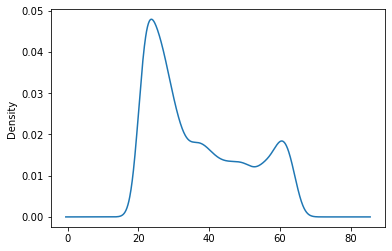

In [22]:
df.age.plot(kind = 'density')
# 나이 컬럼에 대한 밀도 그래프

### 20대 ~ 30 대 나이를 가진 사람 수가 가장 많은 사실을 알 수 있습니다.

<AxesSubplot:ylabel='Density'>

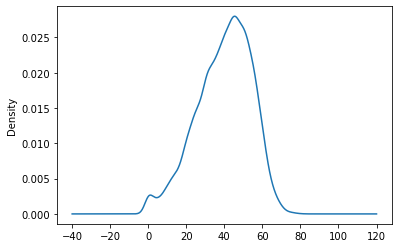

In [23]:
df['sit-ups counts'].plot(kind = 'density')
# 윗몸 일으키기(횟수) 밀도 그래프

### 40회 ~ 50회의 윗몸 일으키기 횟수를 기록한 사람 수가 가장 많은 것을 알 수 있습니다.

<AxesSubplot:xlabel='weight_kg', ylabel='Density'>

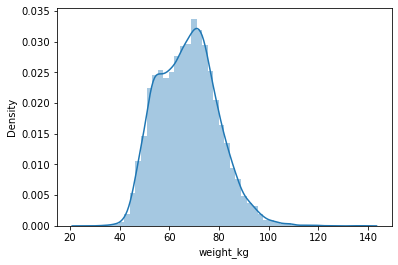

In [24]:
sns.distplot(df['weight_kg'], hist = True, kde = True)
# 몸무게(kg) 밀도 그래프

### 70kg 대의 몸무게를 가진 사람 수가 가장 많은 것을 알 수 있습니다.

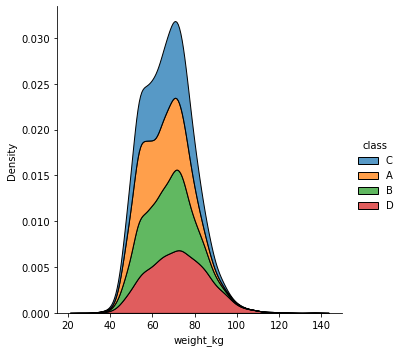

In [28]:
sns.displot(df, x = 'weight_kg', hue = 'class', kind = 'kde', multiple = 'stack')

### C 레벨의 신체 점수를 기록한 사람 수가 가장 많은 것을 알 수 있습니다.

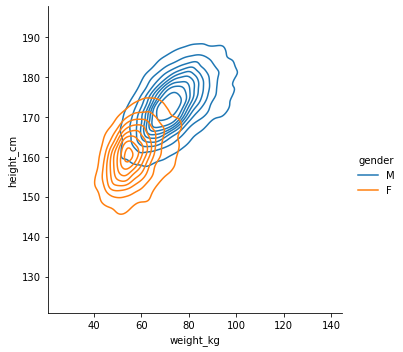

In [32]:
sns.displot(data = df, x = 'weight_kg', y = 'height_cm', hue = 'gender', kind = 'kde')

### 대체적으로 남자가 더 큰 신장(cm) 과 높은 몸무게(kg) 를 기록한 사실을 알 수 있습니다.

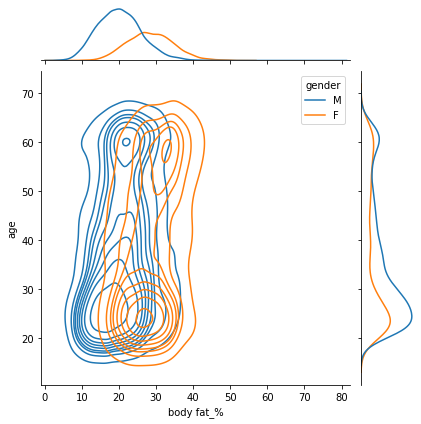

In [31]:
sns.jointplot(data = df, x = 'body fat_%', y = 'age', hue = 'gender', kind = 'kde')
# 성별 간 체지방률 비교

### 전체적으로 여성이 남성보다 체지방률(%) 이 높게 기록된 사실을 알 수 있습니다.

In [5]:
# 수치형, 범주형 컬럼 분리 

numeric = df.select_dtypes(exclude = 'object')
categorical = df.select_dtypes(include = 'object')

In [35]:
for col in numeric.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

# 수치형 컬럼 각각의 IQR(Q3 - Q1)

IQR of age : 23
IQR of height_cm : 12
IQR of weight_kg : 17
IQR of body fat_% : 10
IQR of diastolic : 15
IQR of systolic : 21
IQR of gripForce : 17
IQR of sit and bend forward_cm : 9
IQR of sit-ups counts : 20
IQR of broad jump_cm : 59


In [38]:
for col in numeric.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d' %(col, range))
    
# 수치형 컬럼 각각의 range(max - min)

range of age : 43
range of height_cm : 68
range of weight_kg : 111
range of body fat_% : 75
range of diastolic : 156
range of systolic : 201
range of gripForce : 70
range of sit and bend forward_cm : 238
range of sit-ups counts : 80
range of broad jump_cm : 303


In [40]:
# 추론 통계

df.sample(5)
# 다섯 개의 행 random sampling

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
109,28.0,F,163.6,52.4,20.3,72.0,118.0,31.0,23.5,23.0,130.0,C
7168,34.0,M,176.4,89.8,16.8,93.0,133.0,54.7,23.5,60.0,232.0,B
1840,58.0,M,175.0,73.8,22.2,74.0,120.0,45.1,9.5,33.0,197.0,C
176,58.0,M,168.5,74.9,30.1,89.0,139.0,40.6,15.8,29.0,188.0,B
2208,28.0,F,169.6,68.0,34.6,69.0,126.0,27.2,21.4,26.0,179.0,C


<AxesSubplot:xlabel='weight_kg', ylabel='height_cm'>

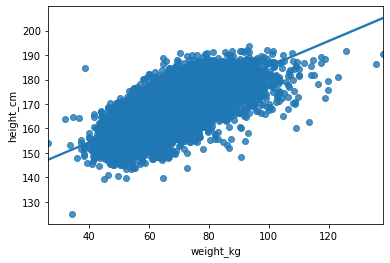

In [43]:
sns.regplot(data = df, x = 'weight_kg', y = 'height_cm', ci = 95)
# regplot - scatter plot + line plot
# 몸무게에 따른 신장 그래프(산점도 + 선 그래프)

In [48]:
def mean_confidence_interval(data, confidence = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m,se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence)/2.,n-1)
    return m,m-h,m+h

# 평균 및 신뢰 구간 계산 함수 생성(평균, - 구간, + 구간)

In [49]:
mean_confidence_interval(df.age, confidence = 0.95)
# 나이 컬럼에 대해 위 함수 적용, 95% 신뢰 구간(평균, - 구간, + 구간)

(36.77510639886508, 36.54432260771787, 37.00589019001228)

In [50]:
import statsmodels.api as sm

sm.stats.DescrStatsW(df.age).zconfint_mean()
# statsmodels 라이브러리를 이용한 신뢰 구간 계산

(36.54434346585151, 37.00586933187864)

In [54]:
import scipy.stats as stats

z_scores = stats.zscore(numeric)
z_scores
# z-score 계산 (x - mean)/ std

array([[-0.71743212,  0.44387298,  0.65215002, ...,  0.37731734,
         1.41696147,  0.67400862],
       [-0.8642197 , -0.42246548, -0.97473438, ...,  0.12898358,
         0.92663372,  0.97501314],
       [-0.42385695,  1.31021144,  0.88312744, ..., -0.37950936,
         0.64644644, -0.22900492],
       ...,
       [ 0.16329338,  1.02538783,  1.09234611, ...,  0.14080899,
         0.36625915,  0.97501314],
       [ 1.99813815, -2.66545136, -0.81572819, ..., -0.71062104,
        -2.7858478 , -2.88787813],
       [-0.20367558, -0.54114198, -0.11275345, ..., -0.9589548 ,
         0.78654008, -0.25408863]])

In [58]:
import researchpy as rp

rp.ttest(group1 = df['body fat_%'][df.gender == 'M'], group1_name = 'Male',
        group2 = df['body fat_%'][df.gender == 'F'], group2_name = 'Female')
# 남자 여자의 체지방률 평균에 대한 독립 t-test 검정

(   Variable        N       Mean        SD        SE  95% Conf.   Interval
 0      Male   8467.0  20.188151  5.952703  0.064692  20.061339  20.314963
 1    Female   4926.0  28.486085  6.224667  0.088689  28.312216  28.659955
 2  combined  13393.0  23.240165  7.256844  0.062706  23.117252  23.363077,
               Independent t-test     results
 0  Difference (Male - Female) =      -8.2979
 1          Degrees of freedom =   13391.0000
 2                           t =     -76.4874
 3       Two side test p value =       0.0000
 4      Difference < 0 p value =       0.0000
 5      Difference > 0 p value =       1.0000
 6                   Cohen's d =      -1.3706
 7                   Hedge's g =      -1.3705
 8               Glass's delta =      -1.3940
 9                 Pearson's r =       0.5514)

In [59]:
stats.ttest_ind(df['body fat_%'][df.gender == 'M'],
               df['body fat_%'][df.gender == 'F'])
# 결과 - 남녀 간 체지방률 평균 간 유의한 차이가 있다(p-value=0.0)

Ttest_indResult(statistic=-76.48742318447472, pvalue=0.0)

In [60]:
from scipy.stats import f_oneway

class1 = df['weight_kg']
class2 = df['body fat_%']
class3 = df['sit-ups counts']

print(f_oneway(class1, class2, class3))

F_onewayResult(statistic=50205.485172216446, pvalue=0.0)


In [63]:
crosstab = pd.crosstab(df.gender, df['class'], margins = True, margins_name = 'Total')
crosstab
# 성별에 따른 신체활동 등급 분류

class,A,B,C,D,Total
gender,,,,,
F,1484,1185,1112,1145,4926
M,1864,2162,2237,2204,8467
Total,3348,3347,3349,3349,13393


<AxesSubplot:>

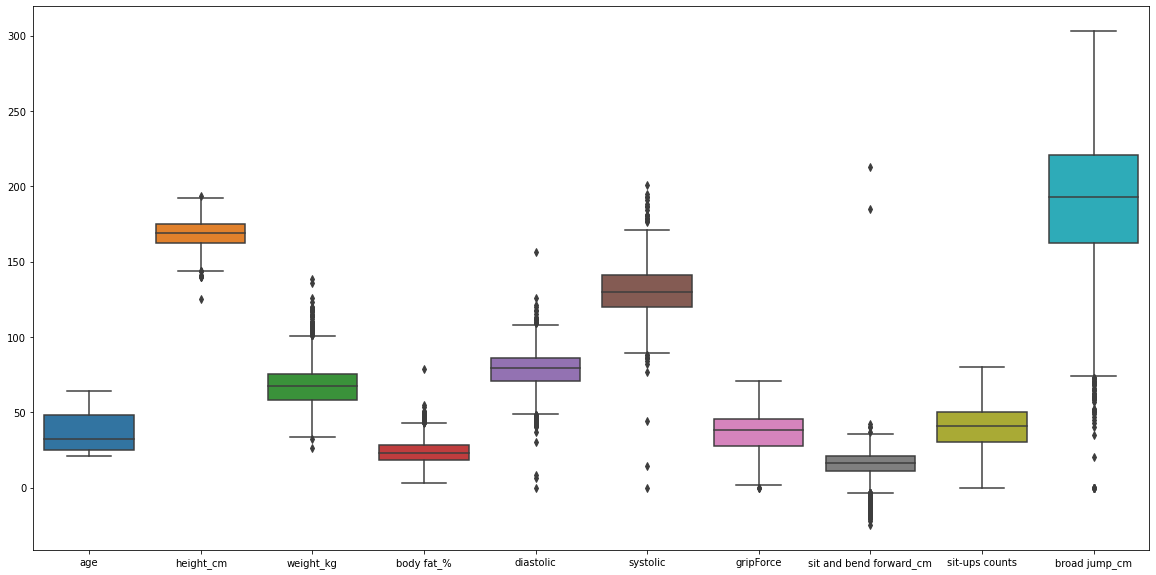

In [64]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df)
# 수치형 컴럼에 대한 boxplot 시각화

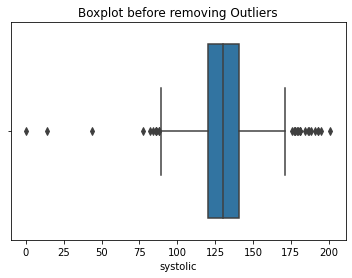

In [66]:
sns.boxplot(df.systolic)
plt.title('Boxplot before removing Outliers')
plt.show()
# 이상치 제거 전 심장 수축기압

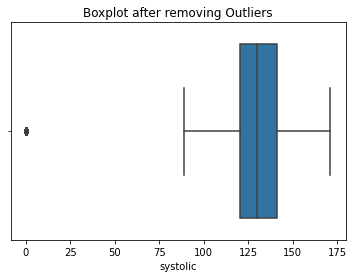

In [67]:
for i in df.systolic:
    q1 = df.systolic.quantile(0.25)
    q3 = df.systolic.quantile(0.75)
    iqr = q3 - q1
    lo = q1 - 1.5 * iqr
    hi = q3 + 1.5 * iqr
    
    if i > hi or i < lo:
        df.systolic = df.systolic.replace(i,0)

sns.boxplot(df.systolic)
plt.title('Boxplot after removing Outliers')
plt.show()
# 이상치 제거 후 심장 수축기압